In [56]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import time
import networkx as nx
import numpy as np
from copy import deepcopy
from pprint import pprint
from tqdm import tqdm
import random
from collections import Counter

In [2]:
australia = nx.read_gpickle('./australia.gpickle')

In [3]:
2*len(australia.edges) / len(australia.nodes)

2.7514740702911

In [4]:
def remove_useless_nodes(G):
    """
    Removes (in-place) nodes with degree 2 but preserves connectivity
    """
    while list(dict(G.degree()).values()).count(2):
        deg = dict(G.degree())
        for node in deg:
            if deg[node] == 2:
                neigh = list(G.neighbors(node))
                if len(neigh) == 1:
                    break
                G.add_edge(neigh[0], neigh[1])
                G.remove_node(node)
    return G

In [5]:
new_aus = deepcopy(australia)
new_aus = remove_useless_nodes(new_aus)
print(list(dict(australia.degree()).values()).count(0))
print(list(dict(australia.degree()).values()).count(2))
print(len(australia.edges))

print(list(dict(new_aus.degree()).values()).count(0))
print(list(dict(new_aus.degree()).values()).count(2))
print(len(new_aus.edges))


0
3779
29632
0
0
25743


In [6]:
betweenness = nx.betweenness_centrality(new_aus, k=200)

In [7]:
bet = [[a,b] for b,a in betweenness.items()]
bet.sort(reverse=True)
bet[:10]

[[0.2897659702815553, 460],
 [0.28815402306490867, 16730],
 [0.24086787328439718, 12825],
 [0.23768718204907532, 10215],
 [0.23741401175083168, 4894],
 [0.2373167845373676, 4169],
 [0.2373094520722549, 4170],
 [0.23726601078772824, 12180],
 [0.2372309282597521, 13344],
 [0.23630164573989182, 8568]]

In [8]:
print(new_aus.get_edge_data(460, 16730))
print('\n')
for b in bet[:3]:
    print('{}: {},   {}'.format(b[1], b[0], new_aus.node[b[1]]))

{'weight': 0.9730298195361999, 'ROADID': 'ITOS422266', 'FCLASS': 0.0, 'CRGWAY': 0.0, 'NUMLANES': 0.0, 'SPEEDLIMIT': 0.0, 'GNRALSPEED': 0.0}


460: 0.2897659702815553,   {'coords': (131.73997000000008, -28.53911999999997)}
16730: 0.28815402306490867,   {'coords': (132.19168000000002, -28.63299999999998)}
12825: 0.24086787328439718,   {'coords': (135.87309000000005, -30.081199999999967)}


In [62]:
G = None
best = 0
for x in nx.connected_component_subgraphs(new_aus):
    size = len(x.nodes)
    if size > best:
        best = size
        G = x
nx.set_edge_attributes(G, 1, 'weight')
nx.set_edge_attributes(G, 1, 'flow')

In [57]:
def mean(s):
    return sum(s) / len(s)

def estimate_ave_path_length(G, N):
    means = []
    running_mean = []
    nodes = list(G.nodes)
    nodes = random.sample(nodes, N)
    for node in tqdm(nodes):
        new = list(nx.single_source_dijkstra_path_length(G, node).values())
        means.append(mean(new))
        running_mean.append(mean(means))
    return running_mean[-1], running_mean

100%|██████████████████████████████████████| 2000/2000 [02:56<00:00, 11.31it/s]


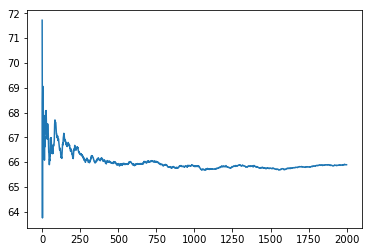

65.89470839305163


In [58]:
est, prog = estimate_ave_path_length(G, 2000)
plt.plot(range(len(prog)),prog)
plt.show()
print(est)

In [59]:
print('Number of nodes: {}'.format(len(G.nodes)))
print('Average path length: {}'.format(est))
print('Clustering coefficient: {}'.format(nx.average_clustering(G)))
print('Degree distribution:', end=' ')
pprint(Counter(list(dict(G.degree).values())))


Number of nodes: 17443
Average path length: 65.89470839305163
Clustering coefficient: 0.1689782185145373
Degree distribution: Counter({3: 10277,
         4: 4875,
         1: 1439,
         5: 509,
         2: 314,
         6: 18,
         7: 6,
         8: 2,
         9: 1,
         1808: 1,
         2224: 1})


In [60]:
deg = dict(G.degree)
m = max(deg.values())
for key in deg:
    if deg[key]==m:
        print('Coordinates of node with largest degree ({}): {}'.format(m,G.node[key]))
        break

Coordinates of node with largest degree (2224): {}


In [67]:
def euclid_dist(n1, n2):
    return ((n1[0] - n2[0])**2 + (n1[1] - n2[1])**2 ) **.5



def max_flow_neighborhood(G, sourcecoords=None, sinkcoords=None, radius=1, flow='flow'):
    
    if sourcecoords is None:
        center = random.choice(list(G.nodes))
        sourcecoords = G.node[center]['coords']

    if sinkcoords is None:
        center = random.choice(list(G.nodes))
        sinkcoords = G.node[center]['coords']

        
    G.add_node('SOURCE')
    G.add_node('SINK')

    
    for node in G:
        if node == 'SOURCE' or node == 'SINK':
            continue
        if euclid_dist(G.node[node]['coords'], sourcecoords) < radius:
            G.add_edge('SOURCE', node, flow = 10**20)
            print(G.get_edge['SOURCE'][node])
            break
        if euclid_dist(G.node[node]['coords'], sinkcoords) < radius:
            G.add_edge('SINK', node, flow = 10**20)
            
    max_flow, flow = nx.maximum_flow(G, 'SOURCE', 'SINK', capacity='flow')
    G.remove_edge('SINK')
    G.remove_edge('SOURCE')
    return flow
    

In [68]:
print(max_flow_neighborhood(G))

AttributeError: 'Graph' object has no attribute 'get_edge'

In [52]:
min_cut = nx.minimum_cut(G, 'SOURCE', 'SINK', capacity='weight')

(9,
 ({8203,
   12,
   13,
   16402,
   16403,
   26,
   27,
   16414,
   16419,
   8230,
   16422,
   16423,
   44,
   48,
   8245,
   8247,
   8248,
   8249,
   16440,
   16441,
   60,
   61,
   16444,
   8256,
   66,
   67,
   16455,
   8265,
   8266,
   16459,
   16460,
   16461,
   8272,
   8276,
   8277,
   16468,
   16469,
   16472,
   16473,
   91,
   16476,
   93,
   94,
   16482,
   101,
   102,
   8294,
   16488,
   8297,
   16492,
   109,
   110,
   16495,
   16496,
   16497,
   8306,
   8307,
   121,
   122,
   123,
   124,
   16507,
   16509,
   16512,
   129,
   130,
   16513,
   16518,
   138,
   16523,
   16525,
   145,
   146,
   16532,
   16533,
   8354,
   8355,
   16547,
   165,
   166,
   8357,
   8358,
   169,
   170,
   16550,
   16551,
   16552,
   16553,
   177,
   178,
   179,
   180,
   181,
   182,
   16568,
   8382,
   8383,
   8385,
   8388,
   16583,
   16584,
   203,
   204,
   8396,
   8397,
   16587,
   16595,
   8405,
   8406,
   8407,
   16597,
   8